In [5]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import math

import modeling as mod
import wrangle as w
from modeling import *

In [40]:
df = mod.create_modeling_df()

modeling.csv detected. 
 Dataframe available.


In [41]:
X_train, X_validate, X_test,\
y_train, y_validate, y_test = mod.split_and_scale(df)

print('X_train:', X_train.shape)
print('X_validate:', X_validate.shape)
print('X_test:', X_test.shape)

X_train: (3859, 60)
X_validate: (1655, 60)
X_test: (1379, 60)


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The m


 -----------------------------------------
Logistic Regression Precision
Best Score = 0.9628
Best Hyper-parameters = {'C': 1000, 'solver': 'lbfgs'}

Test Scores:
0.8486 (+/-0.013) for {'C': 1, 'solver': 'newton-cg'}
0.8486 (+/-0.013) for {'C': 1, 'solver': 'lbfgs'}
0.8486 (+/-0.013) for {'C': 1, 'solver': 'sag'}
0.8486 (+/-0.013) for {'C': 1, 'solver': 'saga'}
0.8647 (+/-0.011) for {'C': 10, 'solver': 'newton-cg'}
0.8647 (+/-0.011) for {'C': 10, 'solver': 'lbfgs'}
0.8647 (+/-0.011) for {'C': 10, 'solver': 'sag'}
0.8647 (+/-0.011) for {'C': 10, 'solver': 'saga'}
0.9015 (+/-0.012) for {'C': 100, 'solver': 'newton-cg'}
0.9015 (+/-0.012) for {'C': 100, 'solver': 'lbfgs'}
0.9009 (+/-0.011) for {'C': 100, 'solver': 'sag'}
0.8966 (+/-0.012) for {'C': 100, 'solver': 'saga'}
0.9628 (+/-0.006) for {'C': 1000, 'solver': 'newton-cg'}
0.9628 (+/-0.006) for {'C': 1000, 'solver': 'lbfgs'}
0.9390 (+/-0.008) for {'C': 1000, 'solver': 'sag'}
0.9123 (+/-0.012) for {'C': 1000, 'solver': 'saga'}

Training

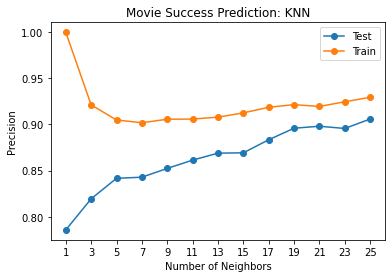

------------------------------------------------

 -----------------------------------------
Decision Tree Regression Precision
Best Score = 0.9946
Best Hyper-parameters = {'max_depth': 11}

Test Scores:
0.9483 (+/-0.008) for {'max_depth': 1}
0.9483 (+/-0.008) for {'max_depth': 2}
0.9855 (+/-0.004) for {'max_depth': 3}
0.9828 (+/-0.003) for {'max_depth': 4}
0.9887 (+/-0.003) for {'max_depth': 5}
0.9920 (+/-0.003) for {'max_depth': 6}
0.9913 (+/-0.005) for {'max_depth': 7}
0.9900 (+/-0.002) for {'max_depth': 8}
0.9933 (+/-0.003) for {'max_depth': 9}
0.9926 (+/-0.001) for {'max_depth': 10}
0.9946 (+/-0.003) for {'max_depth': 11}
0.9920 (+/-0.003) for {'max_depth': 12}
0.9926 (+/-0.004) for {'max_depth': 13}
0.9933 (+/-0.003) for {'max_depth': 14}
0.9913 (+/-0.002) for {'max_depth': 15}
0.9920 (+/-0.003) for {'max_depth': 16}

Training Scores:
0.9493 (+/-0.002) for {'max_depth': 1}
0.9493 (+/-0.002) for {'max_depth': 2}
0.9881 (+/-0.002) for {'max_depth': 3}
0.9894 (+/-0.002) for {'max_de

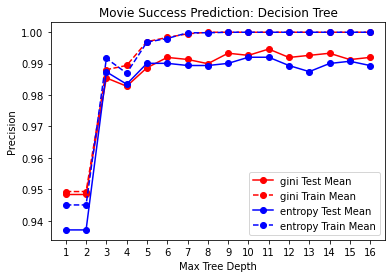

------------------------------------------------
------------------------------------------------


In [8]:
mod.precision_models(X_train, y_train)

In [10]:
# Initial catch-all set, before deciding on precision
# starting forward
tree = DecisionTreeClassifier(max_depth=11,
                               criterion='gini')
sfs = SequentialFeatureSelector(tree, n_features_to_select=8)
sfs1 = sfs.fit(X_train, y_train)

In [34]:
X_train.iloc[:, [12]].head(1)

,is_genre_crime
46,1.0


In [76]:
forward_features = ['vote_average', 'is_genre_adventure', 'is_genre_thriller',
                    'is_long_movie', 'ROI', 'cast_actor_1_Arnold Schwarzenegger',
                    'production_company_UnitedArtists', 'is_genre_crime']

In [77]:
X_train_f = X_train.loc[:, forward_features]
X_validate_f = X_validate.loc[:, forward_features]
X_test_f = X_test.loc[:, forward_features]

In [44]:
#mod.precision_models(X_train, y_train)

In [42]:
tree = DecisionTreeClassifier(max_depth=11,
                               criterion='gini')
sfs = SequentialFeatureSelector(tree, n_features_to_select=8, direction = 'backward')
sfs1 = sfs.fit(X_train, y_train)

In [65]:
#sfs1.get_support()

In [63]:
backward_features = ['vote_average', 'ROI', 'production_company_WarnerBros.',
                    'budget_range_low', 'budget_range_very high',
                     'release_weekday_Saturday', 'release_weekday_Sunday',
                    'release_weekday_Wednesday']

In [64]:
X_train_b = X_train.loc[:, backward_features]
X_validate_b = X_validate.loc[:, backward_features]
X_test_b = X_test.loc[:, backward_features]

In [68]:
#mod.precision_models(X_train_b, y_train)

In [72]:
exploration_features = ['is_genre_comedy', 'is_genre_adventure', 'is_genre_action',
                        'is_genre_drama', 'is_long_movie', 'ROI',
                        'cast_actor_1_Clint Eastwood', 
                        'production_company_Metro-Goldwyn-Mayer(MGM)']
                        
X_train_e = X_train.loc[:, exploration_features]
X_validate_e = X_validate.loc[:, exploration_features]
X_test_e = X_test.loc[:, exploration_features]                        

------------------
Number of records:  1379
------------------
Confusion Matrix:
[['tn: 837' 'fp: 0']
 ['fn: 35' 'tp: 507']]
------------------
Accuracy: 97.461928934 %
------------------
TPR: 93.5424 %
TNR: 100.0000 %
FPR: 0.0000 %
FNR: 6.4576 %
------------------
Precision: 1.0000
Recall: 0.9354
------------------
F1-Measure: 0.9666


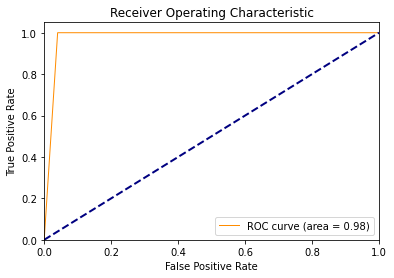

In [79]:
mod.predict_on_test(X_train_f, y_train, X_test_f, y_test)

In [75]:
#mod.precision_models(X_train_e, y_train)

In [ ]:
#Logistic Regression Precision
#Best Score = 0.9993
#Best Hyper-parameters = {'C': 100, 'solver': 'newton-cg'}

#Decision Tree Regression Precision
#Best Score = 0.9967
#Best Hyper-parameters = {'max_depth': 13}

In [ ]:
#logReg = LogisticRegression(C= 10, solver = 'lbfgs', max_iter=1000)
#sfs2 = SequentialFeatureSelector(logReg, n_features_to_select=10)
#sfs3 = sfs2.fit(X_train, y_train)

In [ ]:
#precision_features = ['production_company_Metro-Goldwyn-Mayer(MGM)','production_company_other_company',
#                      'cast_actor_1_Tom Cruise', 'cast_actor_1_Robert De Niro','vote_count',
#                      'is_genre_scifi','production_company_NewLineCinema', 'budget',
#                      'is_genre_thriller', 'cast_actor_1_Nicolas Cage']
#
#X_train = X_train.loc[:, precision_features]
#X_validate = X_validate.loc[:, precision_features]
#X_test = X_test.loc[:, precision_features]